In [80]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import missingno as ms

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#Function
import sys
sys.path.append(r'D:\Project\Lead_scoring_model\lead_model\Function')

from univariate_categorical import univariate_categorical
from null_value_treatment import Cat_info, Num_info

In [81]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

<a id="input"></a>
<h2 name='libraries'>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Importing the Input file
            </span>   
        </font>    
</h2>

In [82]:
data = pd.read_csv('Lead Scoring.csv')

In [83]:
encode_col = ['CUST_CODE', 'LEAD_ID', 'ID_ORIGIN', 'ID_SOURCE', 'RECEIVE_EMAIL', 'RECEIVE_CALL', 'CONVERTED', 'TOTAL_VISITS', 'TIME_ON_SITE',
              'PAGE_VIEWS_VISIT', 'LAST_ACTIVITY', 'CUST_COUNTRY', 'CUST_BACKGROUND', 'SOURCE_KNOWN', 'WORK_STATUS', 'COURSE_PRIORITY', 'SEARCH_OPENED',
              'MAGAZINE_OPENED', 'ARTICLE_OPENED', 'FORUMS_OPENED', 'NEWSPAPER_OPENED', 'DIGITAL_AD_OPENED', 'RECOMMENDED', 'COURSE_UPDATES', 'TAGS',
              'LEAD_QUALITY', 'SUPPLY_CHAIN_UPDATES', 'DM_UPDATES', 'LEAD_PROFILE', 'CUST_CITY', 'ASYM_ACTIVITY_INDEX', 'ASYM_PROFILE_INDEX',
              'ASYM_ACTIVITY_SCORE', 'ASYM_PROFILE_SCORE', 'PAY_CHEQUE', 'FREE_INTERVIEW_COPY', 'LAST_NOTABLE_ACTIVITY']
data.columns = encode_col

In [84]:
data

,CUST_CODE,LEAD_ID,ID_ORIGIN,ID_SOURCE,RECEIVE_EMAIL,RECEIVE_CALL,CONVERTED,TOTAL_VISITS,TIME_ON_SITE,PAGE_VIEWS_VISIT,LAST_ACTIVITY,CUST_COUNTRY,CUST_BACKGROUND,SOURCE_KNOWN,WORK_STATUS,COURSE_PRIORITY,SEARCH_OPENED,MAGAZINE_OPENED,ARTICLE_OPENED,FORUMS_OPENED,NEWSPAPER_OPENED,DIGITAL_AD_OPENED,RECOMMENDED,COURSE_UPDATES,TAGS,LEAD_QUALITY,SUPPLY_CHAIN_UPDATES,DM_UPDATES,LEAD_PROFILE,CUST_CITY,ASYM_ACTIVITY_INDEX,ASYM_PROFILE_INDEX,ASYM_ACTIVITY_SCORE,ASYM_PROFILE_SCORE,PAY_CHEQUE,FREE_INTERVIEW_COPY,LAST_NOTABLE_ACTIVITY
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [85]:
lead = data.replace('Select', np.nan)

<a id="inspect"></a>
<h2 name='libraries'>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Inspect Dataframe
            </span>   
        </font>    
</h2>

In [86]:
#database dimension
print("Database dimension     :",lead.shape)
print("Database size          :",lead.size)
print("Number of Row          :",len(lead.index))
print("Number of Columns      :",len(lead.columns))

Database dimension     : (9240, 37)
Database size          : 341880
Number of Row          : 9240
Number of Columns      : 37


In [87]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUST_CODE              9240 non-null   object 
 1   LEAD_ID                9240 non-null   int64  
 2   ID_ORIGIN              9240 non-null   object 
 3   ID_SOURCE              9204 non-null   object 
 4   RECEIVE_EMAIL          9240 non-null   object 
 5   RECEIVE_CALL           9240 non-null   object 
 6   CONVERTED              9240 non-null   int64  
 7   TOTAL_VISITS           9103 non-null   float64
 8   TIME_ON_SITE           9240 non-null   int64  
 9   PAGE_VIEWS_VISIT       9103 non-null   float64
 10  LAST_ACTIVITY          9137 non-null   object 
 11  CUST_COUNTRY           6779 non-null   object 
 12  CUST_BACKGROUND        5860 non-null   object 
 13  SOURCE_KNOWN           1990 non-null   object 
 14  WORK_STATUS            6550 non-null   object 
 15  COUR

In [88]:
lead.describe()

,LEAD_ID,CONVERTED,TOTAL_VISITS,TIME_ON_SITE,PAGE_VIEWS_VISIT,ASYM_ACTIVITY_SCORE,ASYM_PROFILE_SCORE
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<a id="nullcal"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Null Value Calculation
            </span>   
        </font>    
</h2>

<Axes: title={'center': 'Null Values Plot'}>

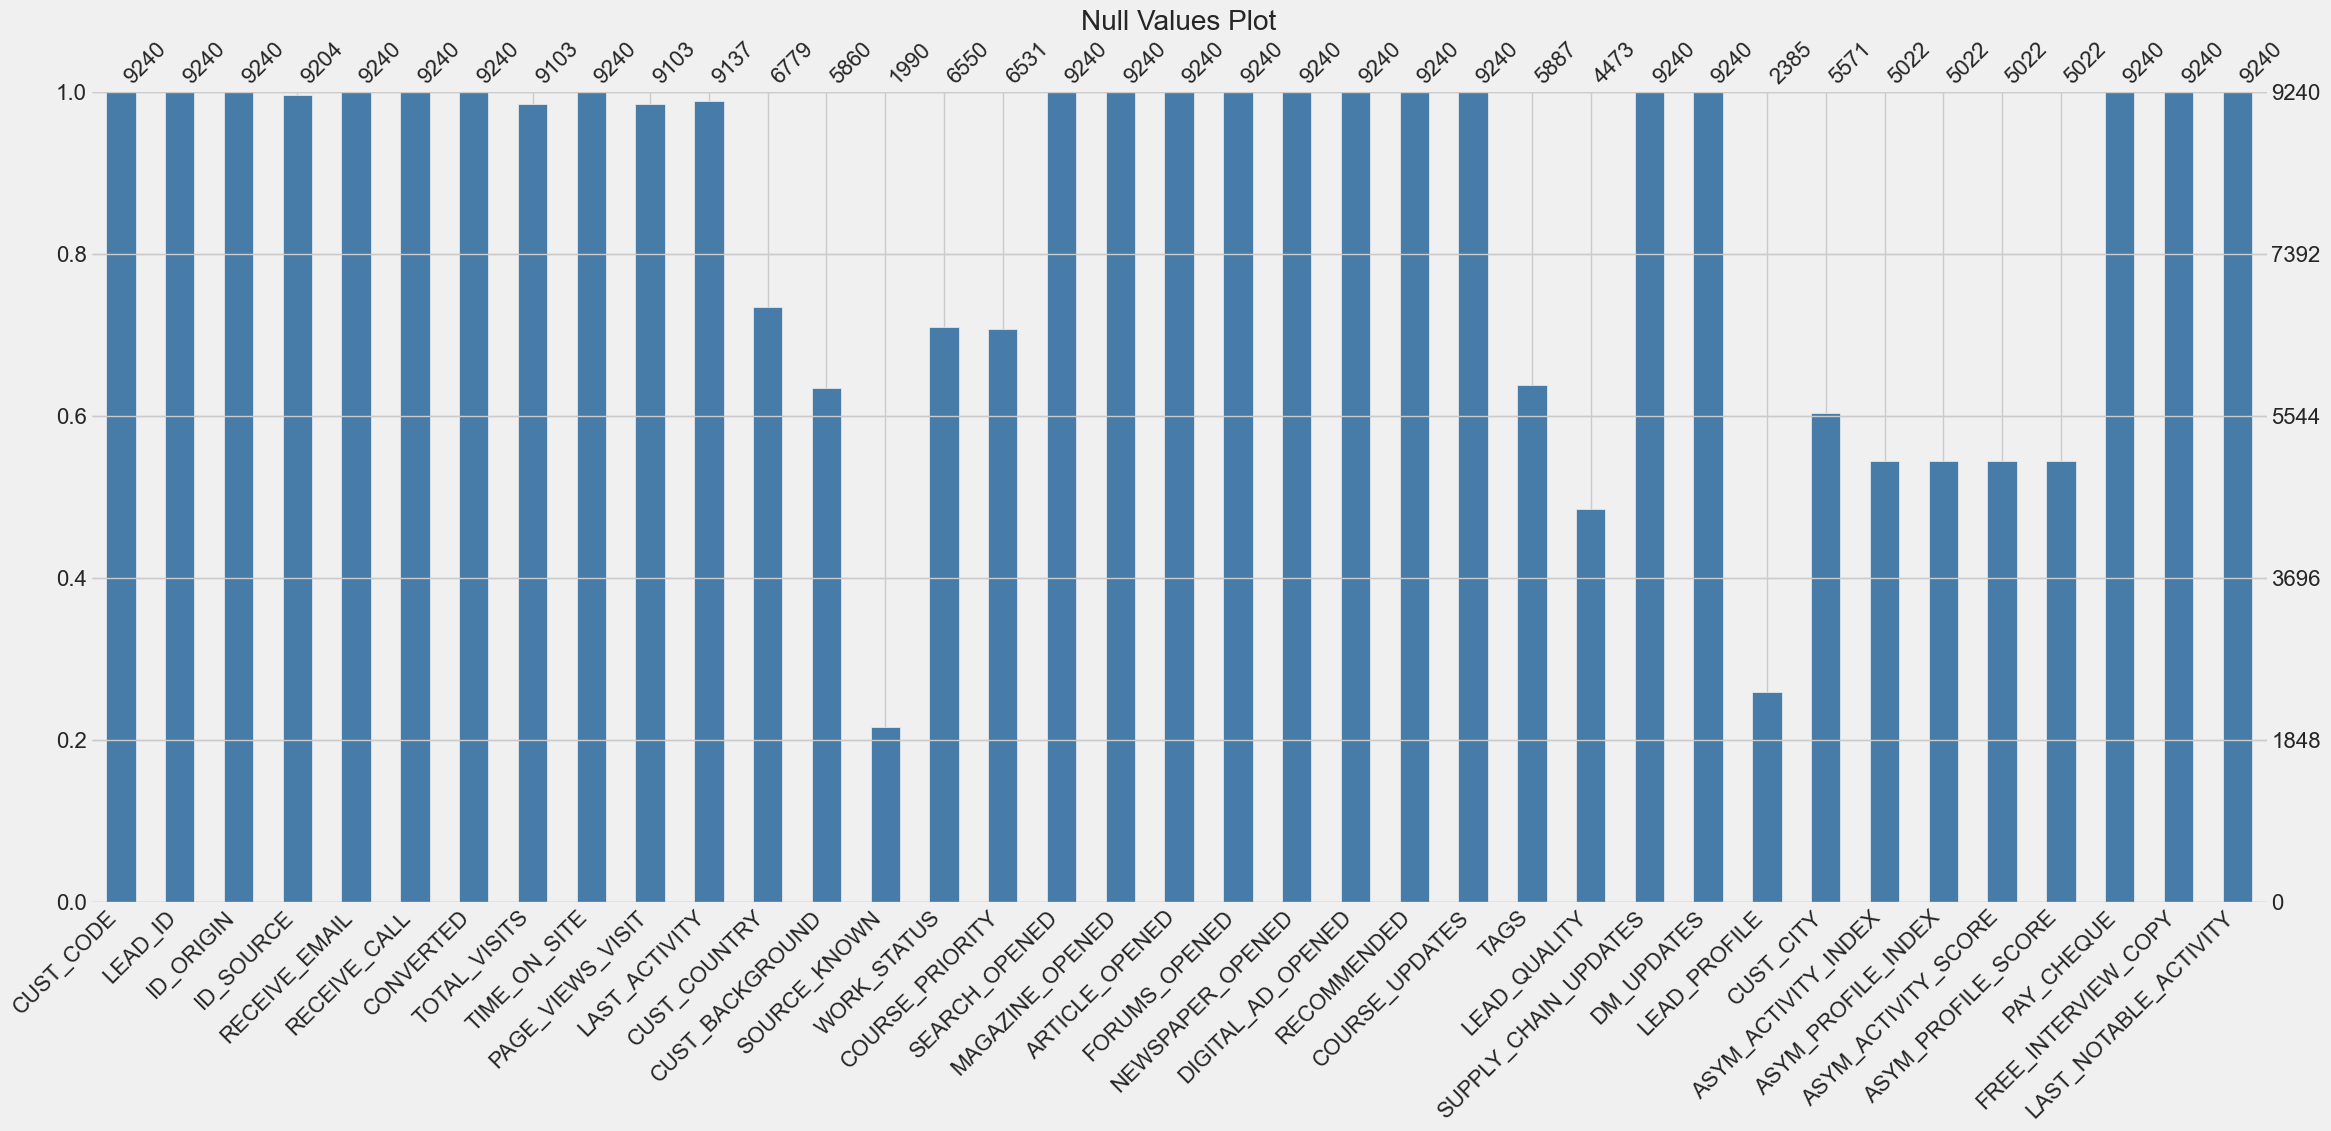

In [89]:
plt.title("Null Values Plot")
ms.bar(lead, color = '#477ca8')

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Column wise Null Value calculation
            </span>   
        </font>    
</h3>

In [90]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,SOURCE_KNOWN,7250,78.46
28,LEAD_PROFILE,6855,74.19
25,LEAD_QUALITY,4767,51.59
33,ASYM_PROFILE_SCORE,4218,45.65
32,ASYM_ACTIVITY_SCORE,4218,45.65
30,ASYM_ACTIVITY_INDEX,4218,45.65
31,ASYM_PROFILE_INDEX,4218,45.65
29,CUST_CITY,3669,39.71
12,CUST_BACKGROUND,3380,36.58
24,TAGS,3353,36.29


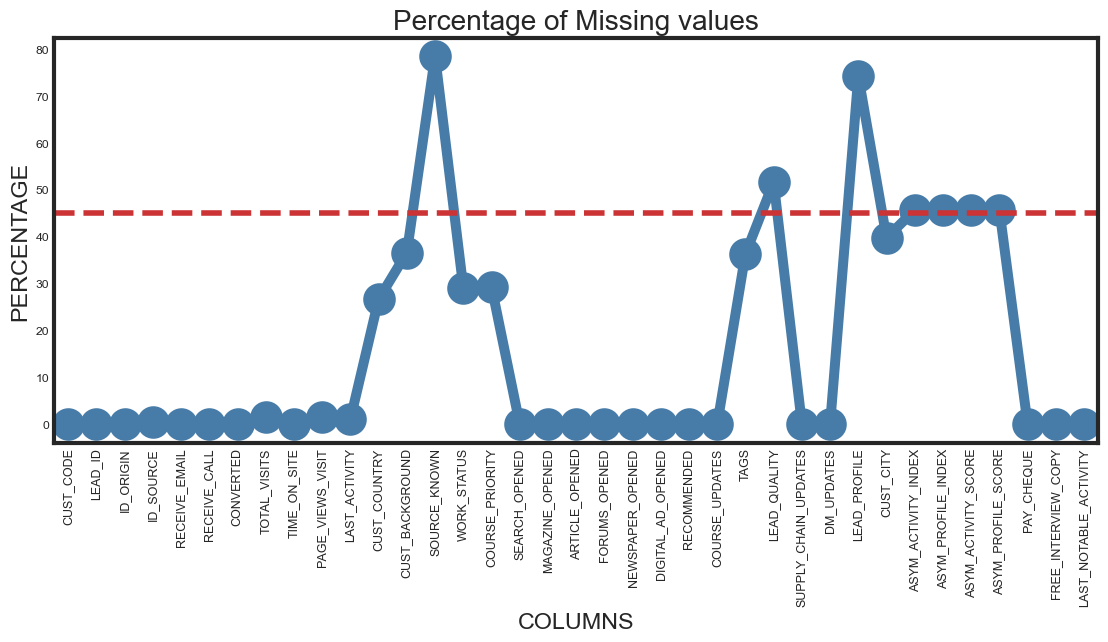

In [91]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()
ax = sns.pointplot(x="index",y= 0, data= null_lead, color= '#477ca8')
plt.xticks(rotation= 90, fontsize= 9)
ax.axhline(45, ls='--', color='#cb3335')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Row wise Null Value calculation
            </span>   
        </font>    
</h3>

In [92]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
print( 'Total number of rows with more than 50% null values are : ', Row_Null50_Count)

Total number of rows with more than 50% null values are :  0


<a id="duplicate"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Duplicate Analysis
            </span>   
        </font>    
</h2>

In [93]:
print("Total number of duplicate values in Customer Code column :" , lead.duplicated(subset = 'CUST_CODE').sum())
print("Total number of duplicate values in Lead ID column :" , lead.duplicated(subset = 'LEAD_ID').sum())

Total number of duplicate values in Customer Code column : 0
Total number of duplicate values in Lead ID column : 0


<a id="datacleaning"></a>
<h1>   
      <font color = yellow >
            <span style='font-family:Georgia'>
            Data Cleaning
            </span>   
        </font>    
</h1>

<a id="delcol"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Delete High Null Columns
            </span>   
        </font>    
</h2>

In [94]:
drop_columns = ['CUST_CODE', 'LEAD_ID', 'SOURCE_KNOWN', 'TAGS', 'LEAD_QUALITY', 'LEAD_PROFILE',
                'ASYM_ACTIVITY_INDEX', 'ASYM_PROFILE_INDEX', 'ASYM_ACTIVITY_SCORE', 'ASYM_PROFILE_SCORE', 'LAST_NOTABLE_ACTIVITY']

#dropping unnecessary columns
lead.drop(drop_columns, axis= 1, inplace = True)
len(lead.columns)

26

<a id="colseg"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Segregating Categorical & Numerical Values
            </span>   
        </font>    
</h2>

In [95]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['ID_ORIGIN' 'ID_SOURCE' 'RECEIVE_EMAIL' 'RECEIVE_CALL' 'LAST_ACTIVITY'
 'CUST_COUNTRY' 'CUST_BACKGROUND' 'WORK_STATUS' 'COURSE_PRIORITY'
 'SEARCH_OPENED' 'MAGAZINE_OPENED' 'ARTICLE_OPENED' 'FORUMS_OPENED'
 'NEWSPAPER_OPENED' 'DIGITAL_AD_OPENED' 'RECOMMENDED' 'COURSE_UPDATES'
 'SUPPLY_CHAIN_UPDATES' 'DM_UPDATES' 'CUST_CITY' 'PAY_CHEQUE'
 'FREE_INTERVIEW_COPY'] 


NUMERICAL FEATURES : 
 ['CONVERTED' 'TOTAL_VISITS' 'TIME_ON_SITE' 'PAGE_VIEWS_VISIT'] 


<a id="catnull"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Categorical Columns Null Value Treatment
            </span>   
        </font>    
</h2>

In [96]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
CUST_CITY,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
CUST_BACKGROUND,"[nan, Business Administration, Media and Adver...",18,3380,36.6
COURSE_PRIORITY,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
WORK_STATUS,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
CUST_COUNTRY,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
LAST_ACTIVITY,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
ID_SOURCE,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
ID_ORIGIN,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
DIGITAL_AD_OPENED,"[No, Yes]",2,0,0.0


In [97]:
# Appending the columns to col_to_drop where only 1 category value is present
cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['PAY_CHEQUE',
 'DM_UPDATES',
 'SUPPLY_CHAIN_UPDATES',
 'COURSE_UPDATES',
 'MAGAZINE_OPENED']

In [98]:
#dropping unnecessary columns
lead.drop(cols_to_drop, axis= 1, inplace = True)
len(lead.columns)

21

In [99]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
CUST_CITY,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
CUST_BACKGROUND,"[nan, Business Administration, Media and Adver...",18,3380,36.6
COURSE_PRIORITY,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
WORK_STATUS,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
CUST_COUNTRY,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
LAST_ACTIVITY,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
ID_SOURCE,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
FORUMS_OPENED,"[No, Yes]",2,0,0.0
RECOMMENDED,"[No, Yes]",2,0,0.0


<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            City
            </span>   
        </font>    
</h3>

In [100]:
lead['CUST_CITY'].value_counts(normalize=True)*100

CUST_CITY
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64

In [101]:
# Let's check how City and Country are connected with each other
lead.groupby(['CUST_COUNTRY','CUST_CITY'])['CUST_COUNTRY'].count()

CUST_COUNTRY          CUST_CITY                  
Australia             Mumbai                            6
                      Other Cities                      2
                      Thane & Outskirts                 3
Bahrain               Mumbai                            1
                      Other Cities                      2
                      Other Cities of Maharashtra       1
                      Thane & Outskirts                 2
                      Tier II Cities                    1
Bangladesh            Other Cities                      2
Belgium               Mumbai                            1
                      Thane & Outskirts                 1
Canada                Mumbai                            3
China                 Mumbai                            1
Denmark               Other Cities                      1
France                Other Cities                      2
                      Other Cities of Maharashtra       2
                      

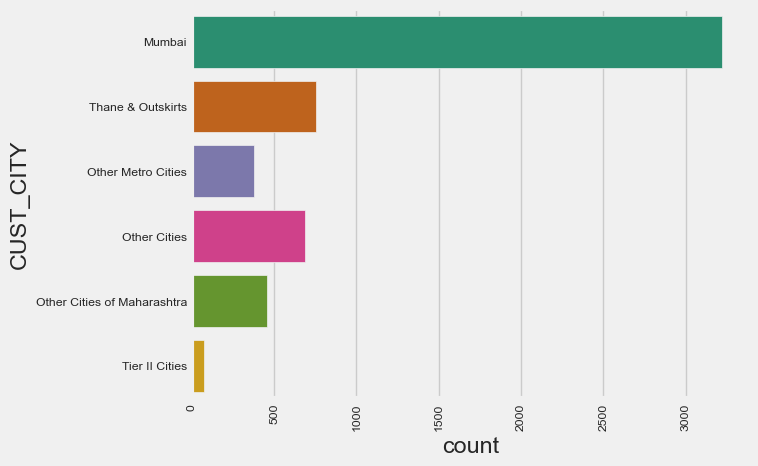

In [102]:
style.use('fivethirtyeight')
ax = sns.countplot(lead['CUST_CITY'],palette = 'Dark2')
plt.xticks(rotation = 90)
plt.show()

In [103]:
lead.drop("CUST_CITY",axis=1, inplace = True)
len(lead.columns)

20

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Specialization
            </span>   
        </font>    
</h3>

In [104]:
lead['CUST_BACKGROUND'].value_counts(normalize = True)*100

CUST_BACKGROUND
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

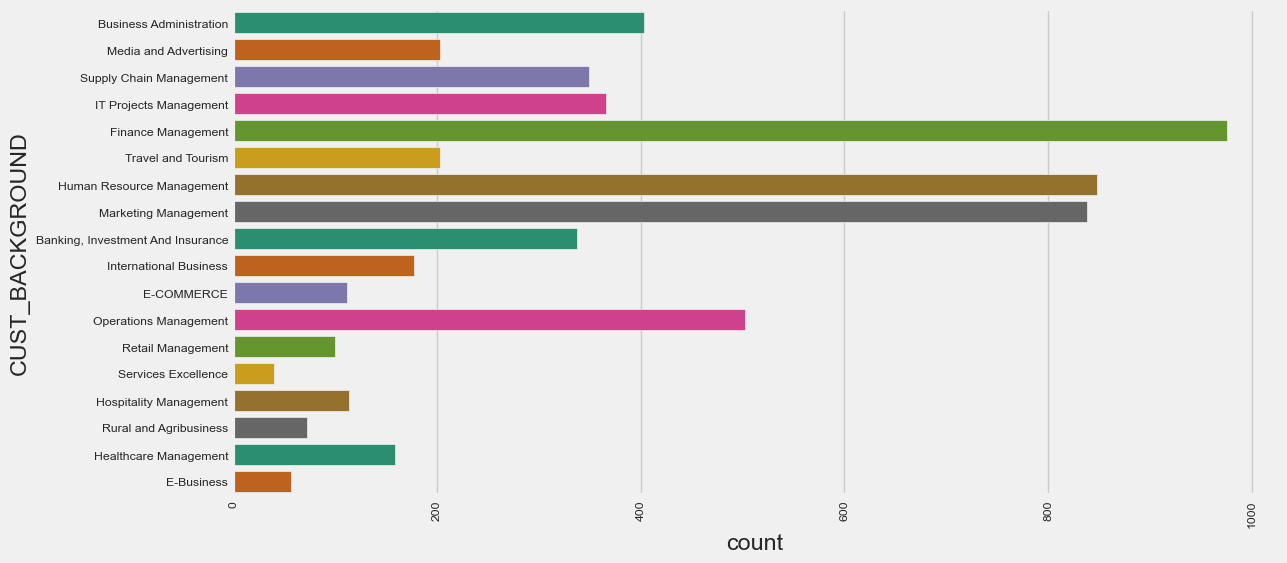

In [105]:
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['CUST_BACKGROUND'],palette = 'Dark2')
plt.xticks(rotation = 90)
plt.show()

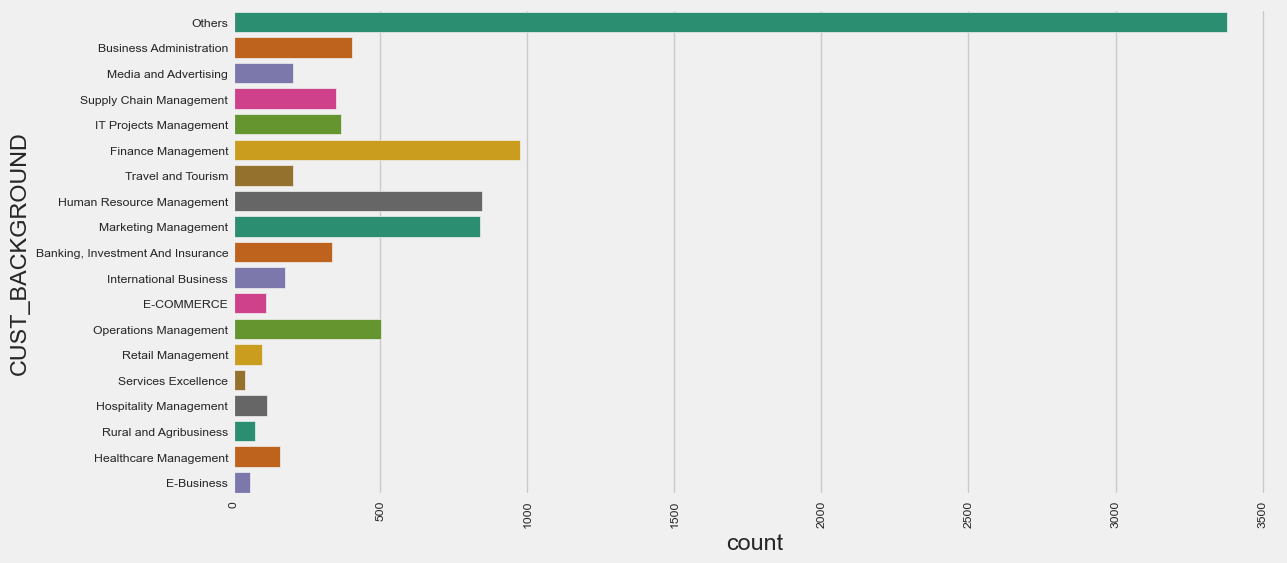

In [106]:
lead['CUST_BACKGROUND'] = lead['CUST_BACKGROUND'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['CUST_BACKGROUND'],palette = 'Dark2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            What matters most to you in choosing a course
            </span>   
        </font>    
</h3>

In [107]:
lead['COURSE_PRIORITY'].value_counts(normalize = True)*100

COURSE_PRIORITY
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [108]:
lead.drop('COURSE_PRIORITY', axis = 1, inplace=True)
len(lead.columns)

19

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            What is your current occupation
            </span>   
        </font>    
</h3>

In [109]:
lead['WORK_STATUS'].value_counts(normalize=True)*100

WORK_STATUS
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

In [110]:
#lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['WORK_STATUS'] = lead['WORK_STATUS'].replace(np.nan, 'Unknown')
lead['WORK_STATUS'].value_counts(normalize = True)*100

WORK_STATUS
Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Country
            </span>   
        </font>    
</h3>

In [111]:
lead['CUST_COUNTRY'].value_counts(normalize=True)

CUST_COUNTRY
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.0001

In [112]:
lead.drop('CUST_COUNTRY', axis = 1, inplace = True)
len(lead.columns)

18

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Last Activity
            </span>   
        </font>    
</h3>

In [113]:
print("Number of null values in Last Activity column is : ", lead['LAST_ACTIVITY'].isnull().sum())
print("Percentage of null values in Last Activity column is : ", round(lead['LAST_ACTIVITY'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Last Activity column is :  103
Percentage of null values in Last Activity column is :  1.11


In [114]:
lead['LAST_ACTIVITY'] = lead['LAST_ACTIVITY'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['LAST_ACTIVITY'].isnull().sum())

Number of null values in Last Activity column is :  0


<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Lead Source
            </span>   
        </font>    
</h3>

In [115]:
print("Number of null values in Lead Source column is : ", lead['ID_SOURCE'].isnull().sum())
print("Percentage of null values in Lead Source column is : ", round(lead['ID_SOURCE'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Lead Source column is :  36
Percentage of null values in Lead Source column is :  0.39


In [116]:
lead['ID_SOURCE'].value_counts(normalize = True)*100

ID_SOURCE
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64

In [117]:
lead['ID_SOURCE'] = lead['ID_SOURCE'].replace(np.nan, 'Google')
lead['ID_SOURCE'] = lead['ID_SOURCE'].replace(['google'], 'Google')
print("Number of null values in Lead Source column is : ", lead['ID_SOURCE'].isnull().sum())

Number of null values in Lead Source column is :  0


<a id="numnull"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Numerical Columns Null Value Treatment
            </span>   
        </font>    
</h2>

In [118]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent
columns,,
TOTAL_VISITS,137,1.5
PAGE_VIEWS_VISIT,137,1.5
CONVERTED,0,0.0
TIME_ON_SITE,0,0.0


<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Total Visits
            </span>   
        </font>    
</h3>

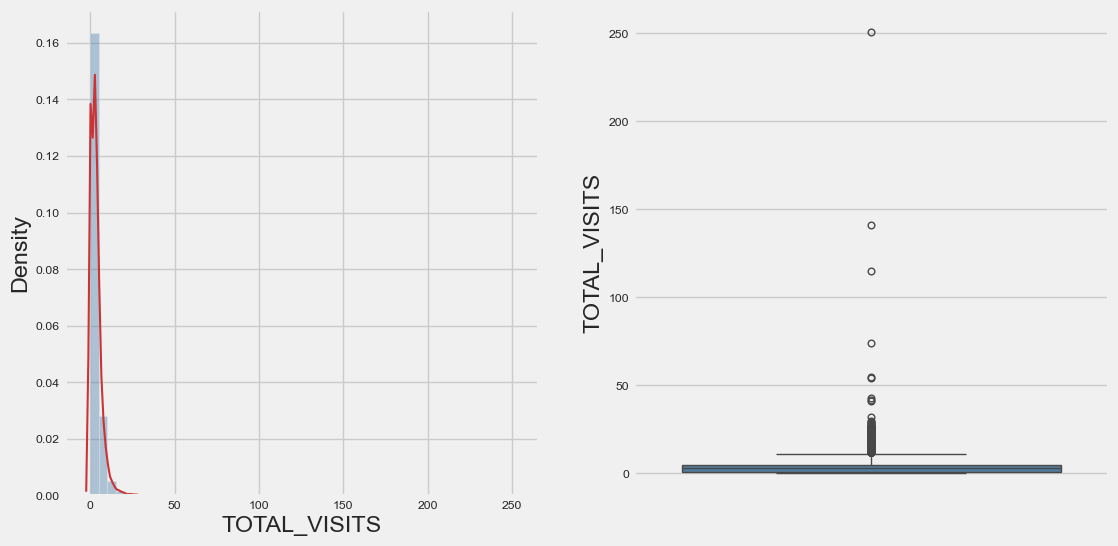

In [119]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TOTAL_VISITS'], kde_kws={"color": "#cb3335", "linewidth": 1.5}, color= '#477ca8')
plt.subplot(1,2,2)
sns.boxplot(lead['TOTAL_VISITS'], color= '#477ca8')
plt.show()

In [120]:
lead['TOTAL_VISITS'].fillna(lead['TOTAL_VISITS'].median(), inplace=True)
lead['TOTAL_VISITS'].isnull().sum()

0

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Page Views Per Visit
            </span>   
        </font>    
</h3>

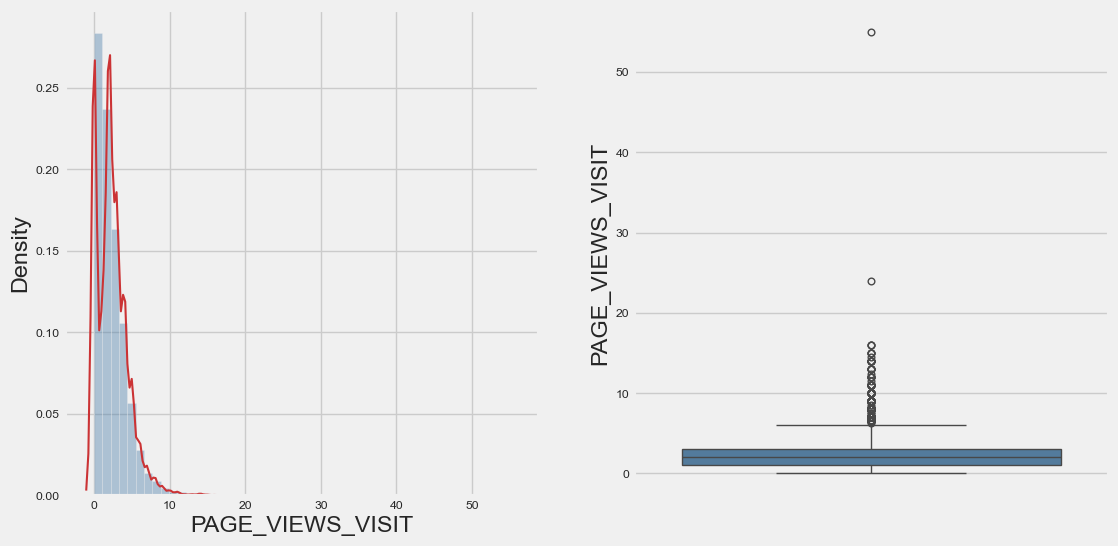

In [121]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['PAGE_VIEWS_VISIT'], kde_kws={"color": "#cb3335", "linewidth": 1.5}, color= '#477ca8')
plt.subplot(1,2,2)
sns.boxplot(lead['PAGE_VIEWS_VISIT'], color= '#477ca8')
plt.show()

In [122]:
lead['PAGE_VIEWS_VISIT'].fillna(lead['PAGE_VIEWS_VISIT'].median(), inplace=True)
lead['PAGE_VIEWS_VISIT'].isnull().sum()

0

<a id="eda"></a>
<h1>   
      <font color = yellow >
            <span style='font-family:Georgia'>
            Exploratory Data Analysis
            </span>   
        </font>    
</h1>

In [123]:
converted = lead['CONVERTED'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


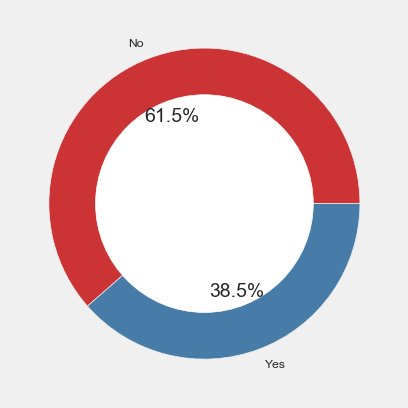

In [124]:
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['#cb3335','#477ca8'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<a id="graphfunc"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Graph Functions
            </span>   
        </font>    
</h2>

<a id="univar"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Univariate Analysis - Categorical
            </span>   
        </font>    
</h2>

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Lead Origin
            </span>   
        </font>    
</h3>

                 ID_ORIGIN  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


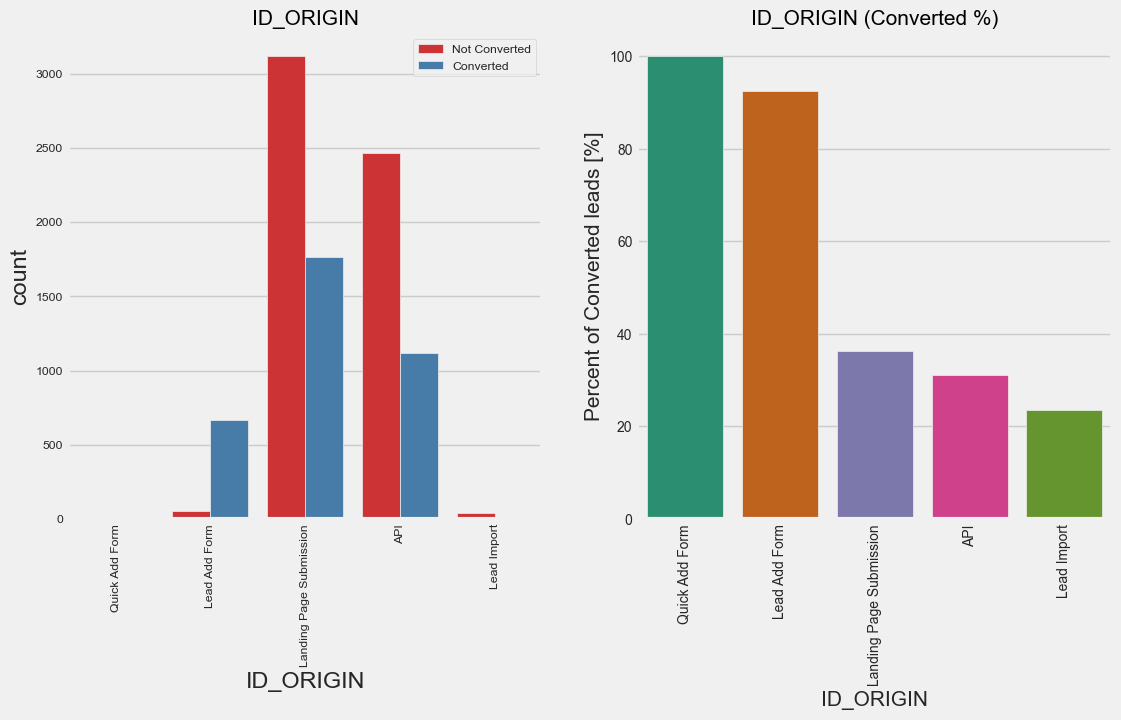

In [125]:
#Run the function to get plot categorical plots 
univariate_categorical(lead, "ID_ORIGIN", label_rotation=True)

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Lead Source
            </span>   
        </font>    
</h3>

            ID_SOURCE  Total Leads   % Values
0              Google         2909  31.482684
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8                bing            6   0.064935
9          Click2call            4   0.043290
10       Social Media            2   0.021645
11          Live Chat            2   0.021645
12      Press_Release            2   0.021645
13  Pay per Click Ads            1   0.010823
14               blog            1   0.010823
15            WeLearn            1   0.010823
16   welearnblog_Home            1   0.010823
17     youtubechannel            1   0.010823
18            testone            1   0.010823
19             NC_EDM            1   0.010823


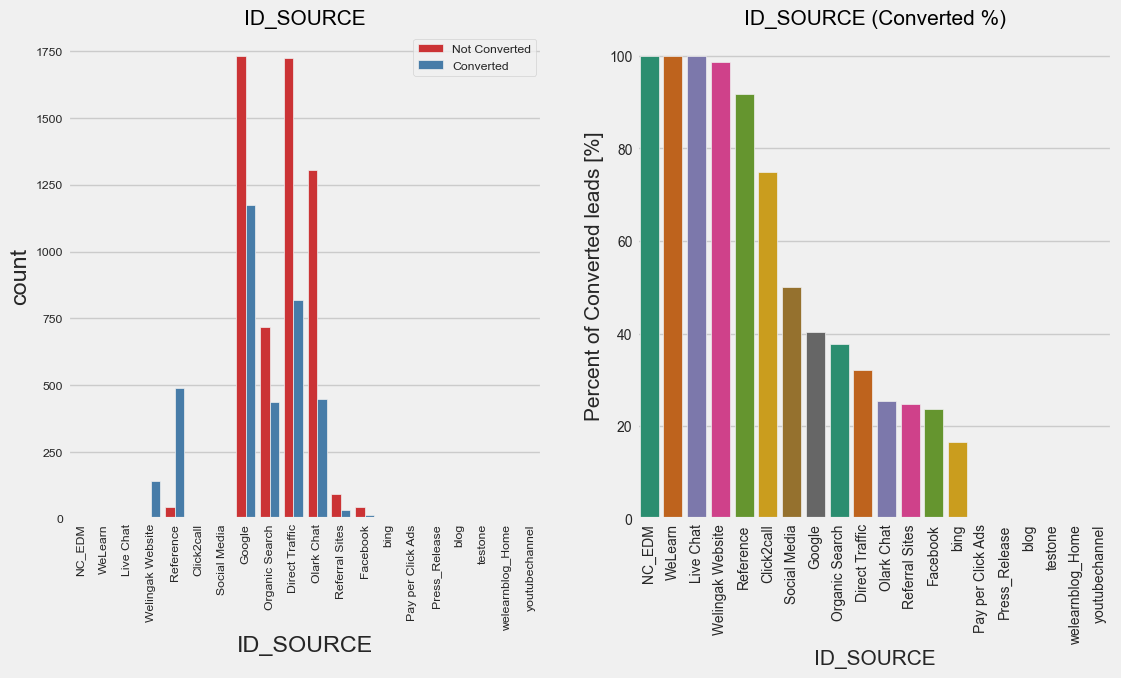

In [126]:
#Run the function to get plot categorical plots
univariate_categorical(lead, "ID_SOURCE",label_rotation=True)

In [127]:
lead['ID_SOURCE'] = lead['ID_SOURCE'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

          ID_SOURCE  Total Leads   % Values
0            Google         2909  31.482684
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7          Facebook           55   0.595238
8     Other Sources           23   0.248918


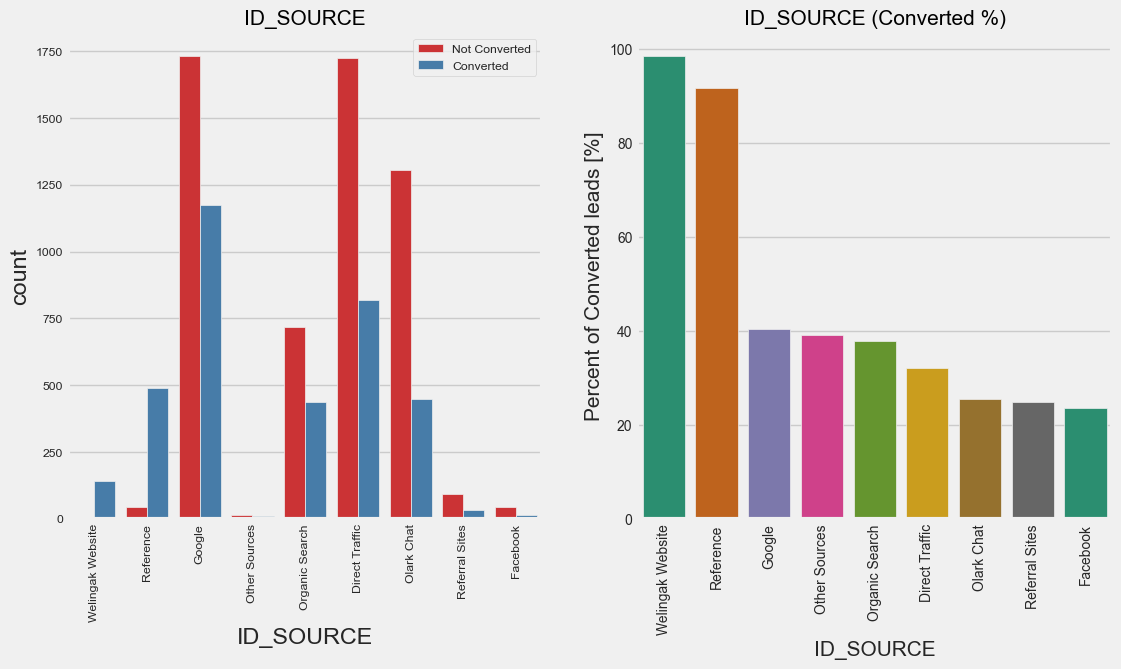

In [128]:
#Running the function again to check the updated statistics
univariate_categorical(lead, "ID_SOURCE",label_rotation=True)

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Do not Email
            </span>   
        </font>    
</h3>

  RECEIVE_EMAIL  Total Leads   % Values
0            No         8506  92.056277
1           Yes          734   7.943723


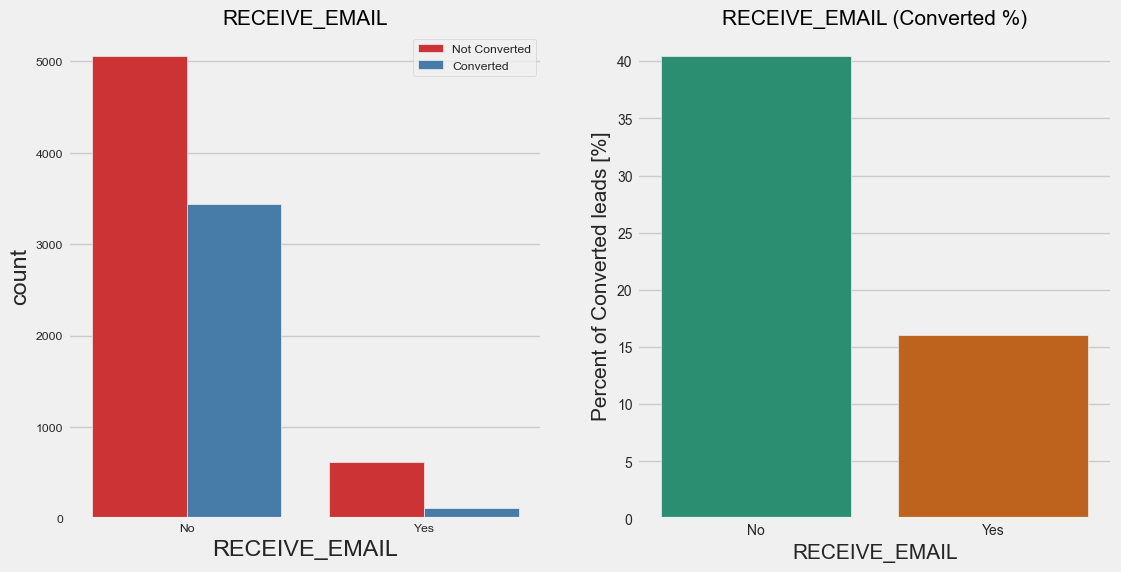

In [129]:
#Run the function to get plot categorical plots
univariate_categorical(lead, "RECEIVE_EMAIL")

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Last Activity
            </span>   
        </font>    
</h3>

                   LAST_ACTIVITY  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15    Visited Booth in Tradeshow            1   0.010823
16        Resubscribed to email

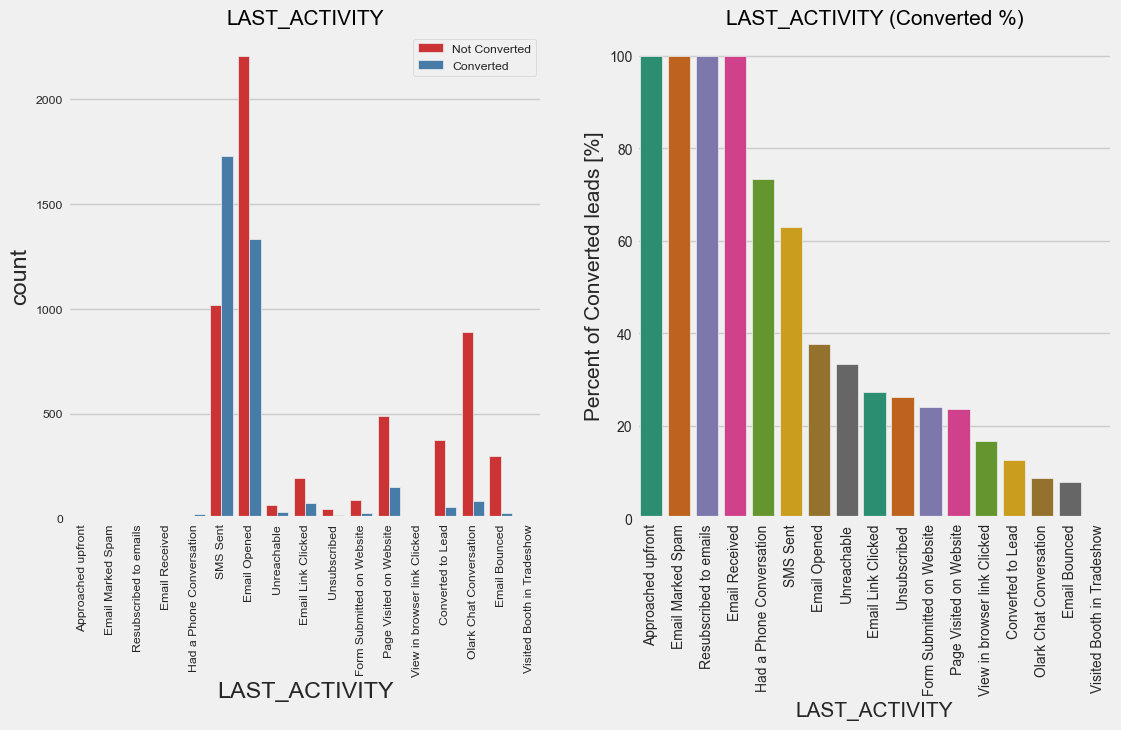

In [130]:
#Run the function to get plot categorical plots
univariate_categorical(lead, "LAST_ACTIVITY",label_rotation=True)

In [131]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['LAST_ACTIVITY'] = lead['LAST_ACTIVITY'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

                LAST_ACTIVITY  Total Leads   % Values
0                Email Opened         3540  38.311688
1                    SMS Sent         2745  29.707792
2     Olark Chat Conversation          973  10.530303
3     Page Visited on Website          640   6.926407
4           Converted to Lead          428   4.632035
5               Email Bounced          326   3.528139
6          Email Link Clicked          267   2.889610
7   Form Submitted on Website          116   1.255411
8                 Unreachable           93   1.006494
9                Unsubscribed           61   0.660173
10             Other Activity           51   0.551948


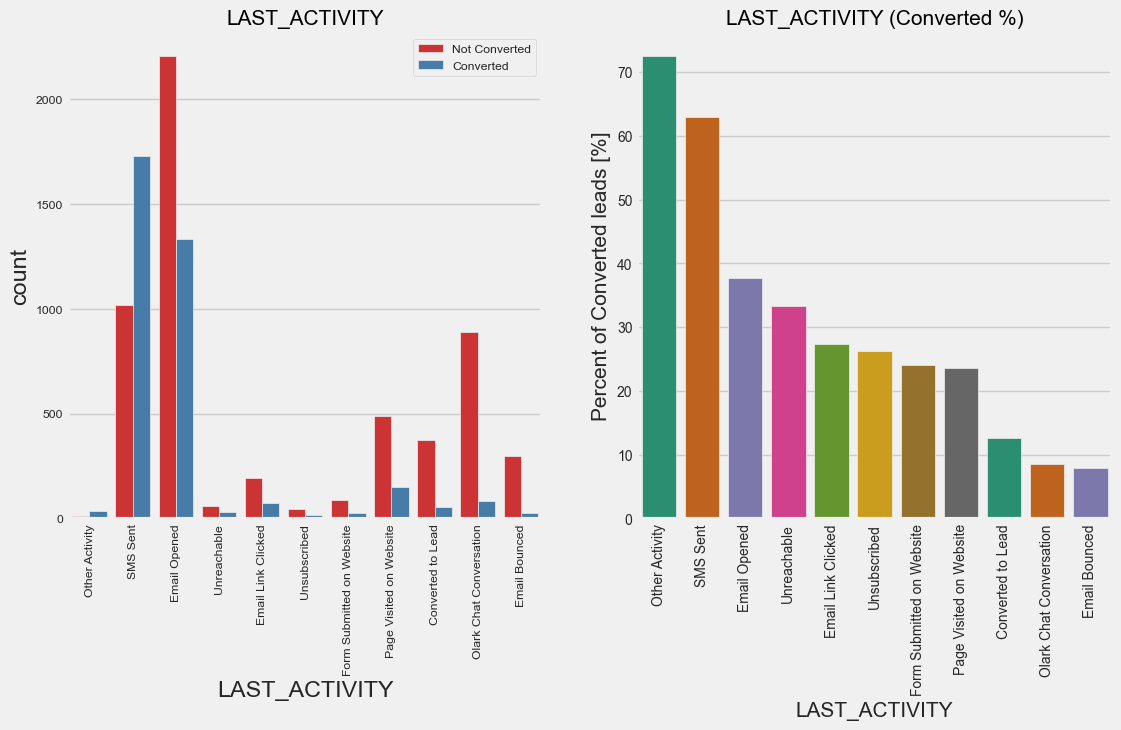

In [132]:
univariate_categorical(lead, "LAST_ACTIVITY",label_rotation=True)

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Specialization
            </span>   
        </font>    
</h3>

                      CUST_BACKGROUND  Total Leads   % Values
0                              Others         3380  36.580087
1                  Finance Management          976  10.562771
2           Human Resource Management          848   9.177489
3                Marketing Management          838   9.069264
4               Operations Management          503   5.443723
5             Business Administration          403   4.361472
6              IT Projects Management          366   3.961039
7             Supply Chain Management          349   3.777056
8   Banking, Investment And Insurance          338   3.658009
9                  Travel and Tourism          203   2.196970
10              Media and Advertising          203   2.196970
11             International Business          178   1.926407
12              Healthcare Management          159   1.720779
13             Hospitality Management          114   1.233766
14                         E-COMMERCE          112   1.212121
15      

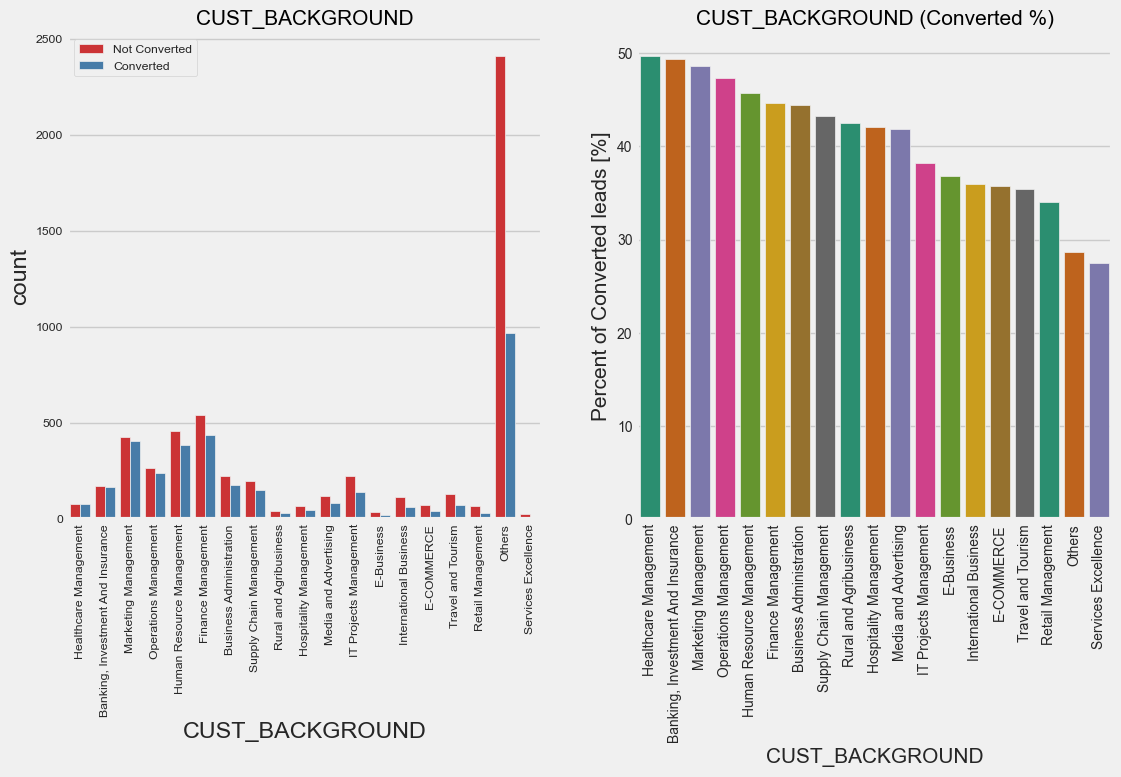

In [133]:
univariate_categorical(lead, "CUST_BACKGROUND",label_rotation=True)

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Occupation
            </span>   
        </font>    
</h3>

            WORK_STATUS  Total Leads   % Values
0            Unemployed         5600  60.606061
1               Unknown         2690  29.112554
2  Working Professional          706   7.640693
3               Student          210   2.272727
4                 Other           16   0.173160
5             Housewife           10   0.108225
6           Businessman            8   0.086580


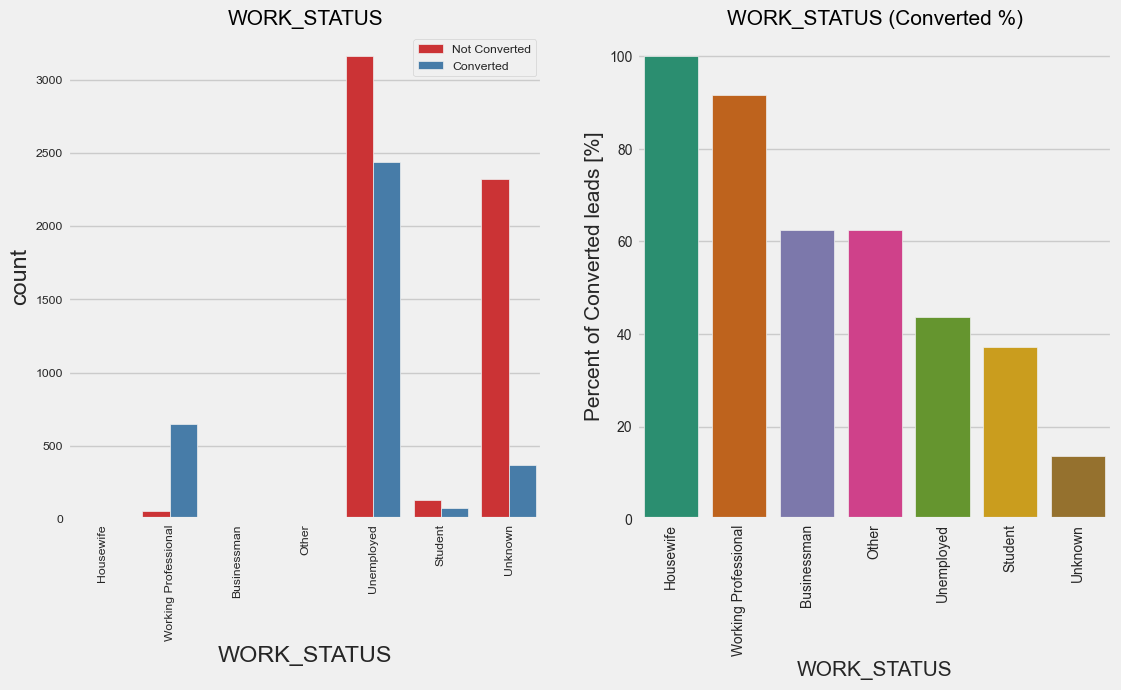

In [134]:
#Run the function to get plot categorical plots
univariate_categorical(lead, "WORK_STATUS",label_rotation=True)

<h3>   
      <font color = lightgreen >
            <span style='font-family:Georgia'>
            Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Free Copy
            </span>   
        </font>    
</h3>

In [135]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels= ["No","Yes"], colors= ['#cb3335', '#477ca8'], autopct= '%1.2f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

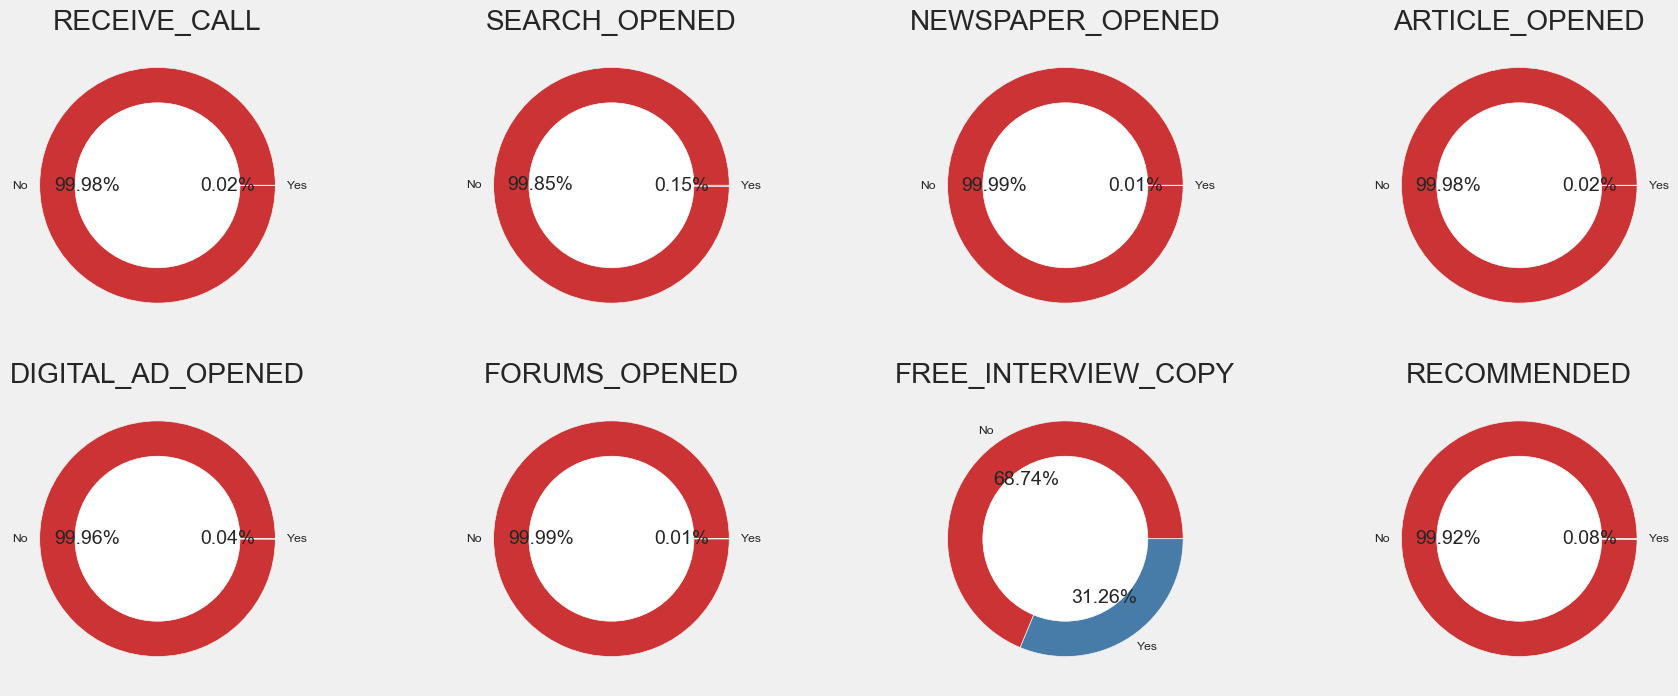

In [136]:
# Lets lookinto the data distribution of the following columns
col = ['RECEIVE_CALL','SEARCH_OPENED', 'NEWSPAPER_OPENED', 
       'ARTICLE_OPENED', 'DIGITAL_AD_OPENED', 'FORUMS_OPENED', 'FREE_INTERVIEW_COPY','RECOMMENDED']
plt.figure(figsize = (20,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

  FREE_INTERVIEW_COPY  Total Leads   % Values
0                  No         6352  68.744589
1                 Yes         2888  31.255411


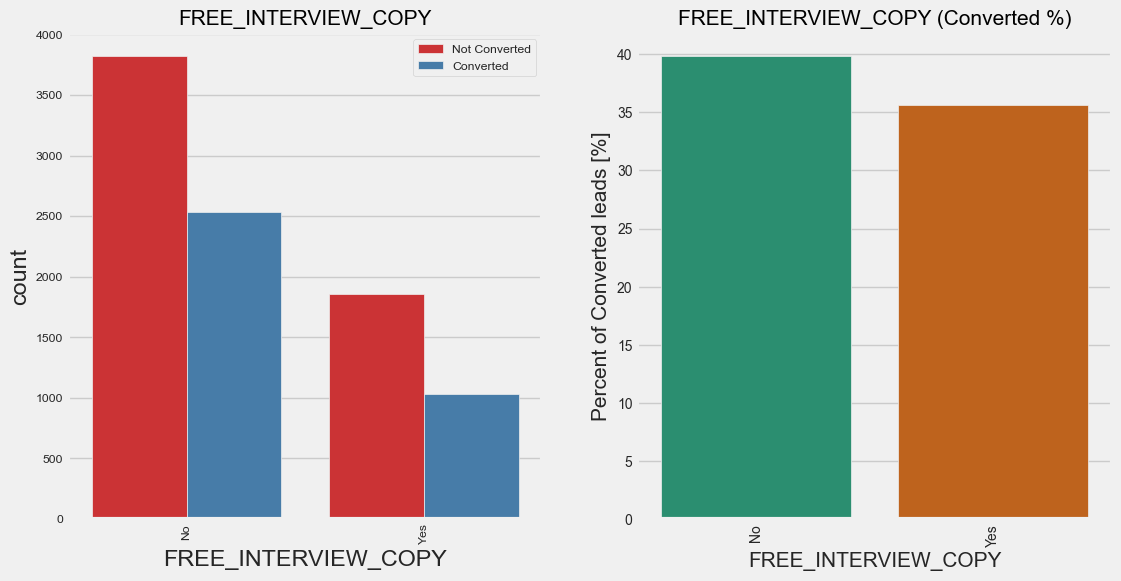

In [137]:
#Run the function to get plot categorical plots
univariate_categorical(lead, "FREE_INTERVIEW_COPY",label_rotation=True)

In [138]:
lead.drop(col, axis = 1, inplace = True)
len(lead.columns)

10

<a id="uninumvar"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Univariate Analysis - Numerical
            </span>   
        </font>    
</h2>

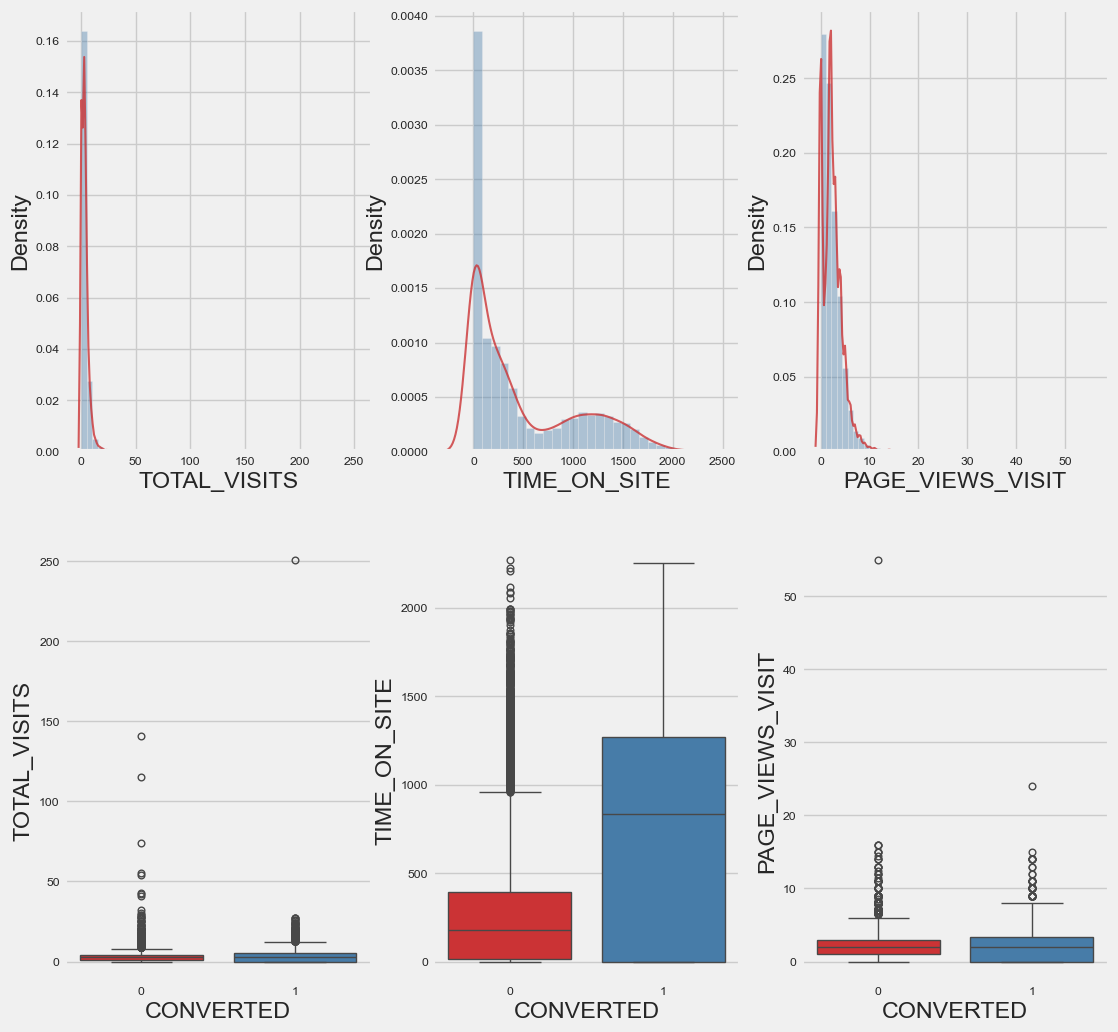

In [139]:
numerical_cols = ['TOTAL_VISITS', 'TIME_ON_SITE', 'PAGE_VIEWS_VISIT']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col], kde_kws={"color": "#cb3335", "alpha": 0.8, "linewidth": 1.5}, color= '#477ca8')
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['CONVERTED'], palette= 'Set1')
    i+=1

<a id="bivar"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Bivariate Analysis
            </span>   
        </font>    
</h2>

<Figure size 2000x2000 with 0 Axes>

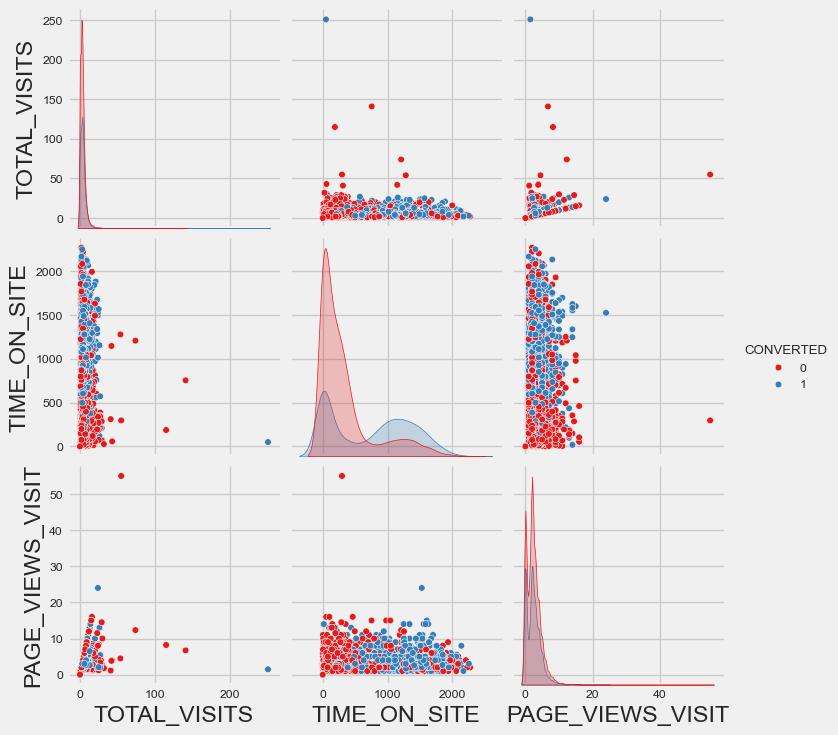

In [140]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col], hue="CONVERTED", kind='scatter', plot_kws= {'alpha': 1}, palette = 'Set1')
plt.show()

<a id="dataprep"></a>
<h1>   
      <font color = yellow >
            <span style='font-family:Georgia'>
            Data Preparation
            </span>   
        </font>    
</h1>

<a id="outlier"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Outliers Treatment
            </span>   
        </font>    
</h2>

In [141]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,CONVERTED,TOTAL_VISITS,TIME_ON_SITE,PAGE_VIEWS_VISIT
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [142]:
numerical_col

array(['CONVERTED', 'TOTAL_VISITS', 'TIME_ON_SITE', 'PAGE_VIEWS_VISIT'],
      dtype=object)

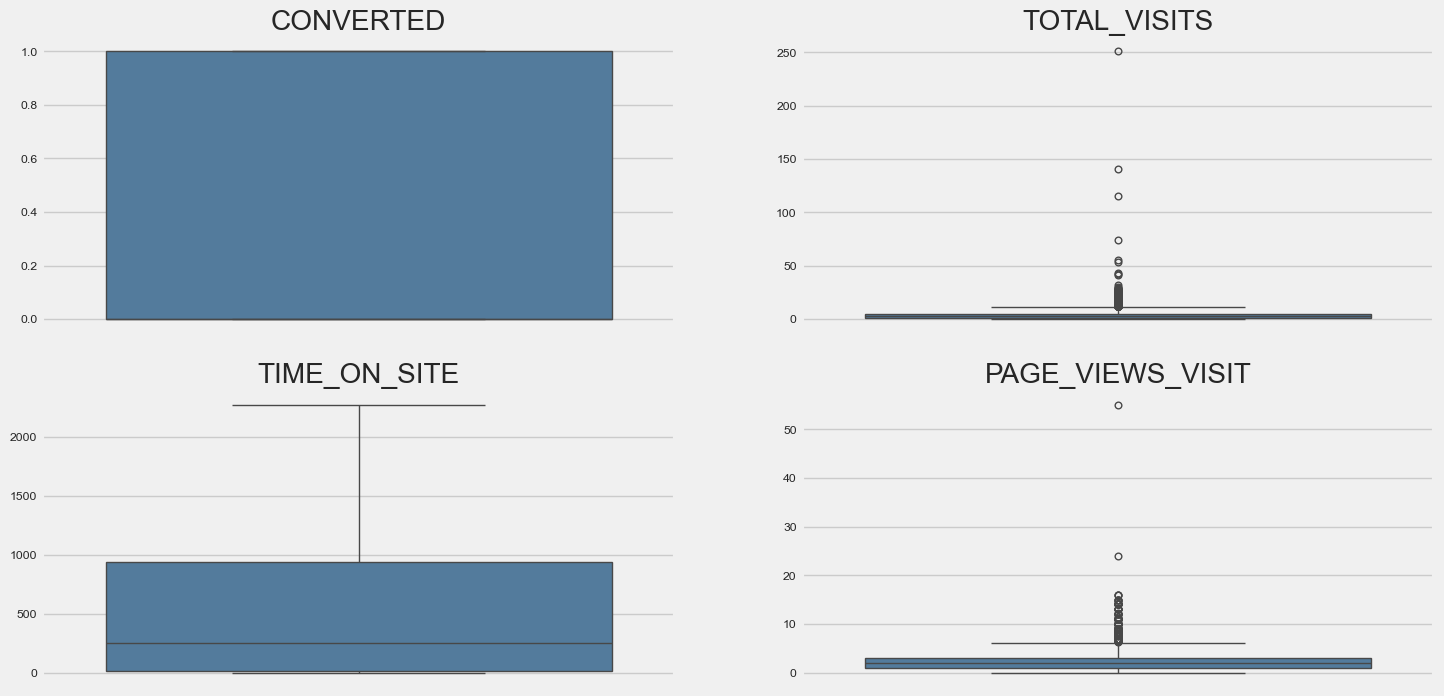

In [143]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col], color= '#477ca8')
    plt.title(col)
    plt.ylabel('')
    i+=1

In [144]:
#Capping the data at 95% percetile value
Q4 = lead['TOTAL_VISITS'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TOTAL_VISITS column : ",len(lead[lead['TOTAL_VISITS'] >= Q4]))
lead.loc[lead['TOTAL_VISITS'] >= Q4, 'TOTAL_VISITS'] = Q4 # outlier capping

Q4 = lead['PAGE_VIEWS_VISIT'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for PAGE_VIEWS_VISIT column : ",len(lead[lead['PAGE_VIEWS_VISIT'] >= Q4]))
lead.loc[lead['PAGE_VIEWS_VISIT'] >= Q4, 'PAGE_VIEWS_VISIT'] = Q4 # outlier capping

Total number of rows getting capped for TOTAL_VISITS column :  467
Total number of rows getting capped for PAGE_VIEWS_VISIT column :  604


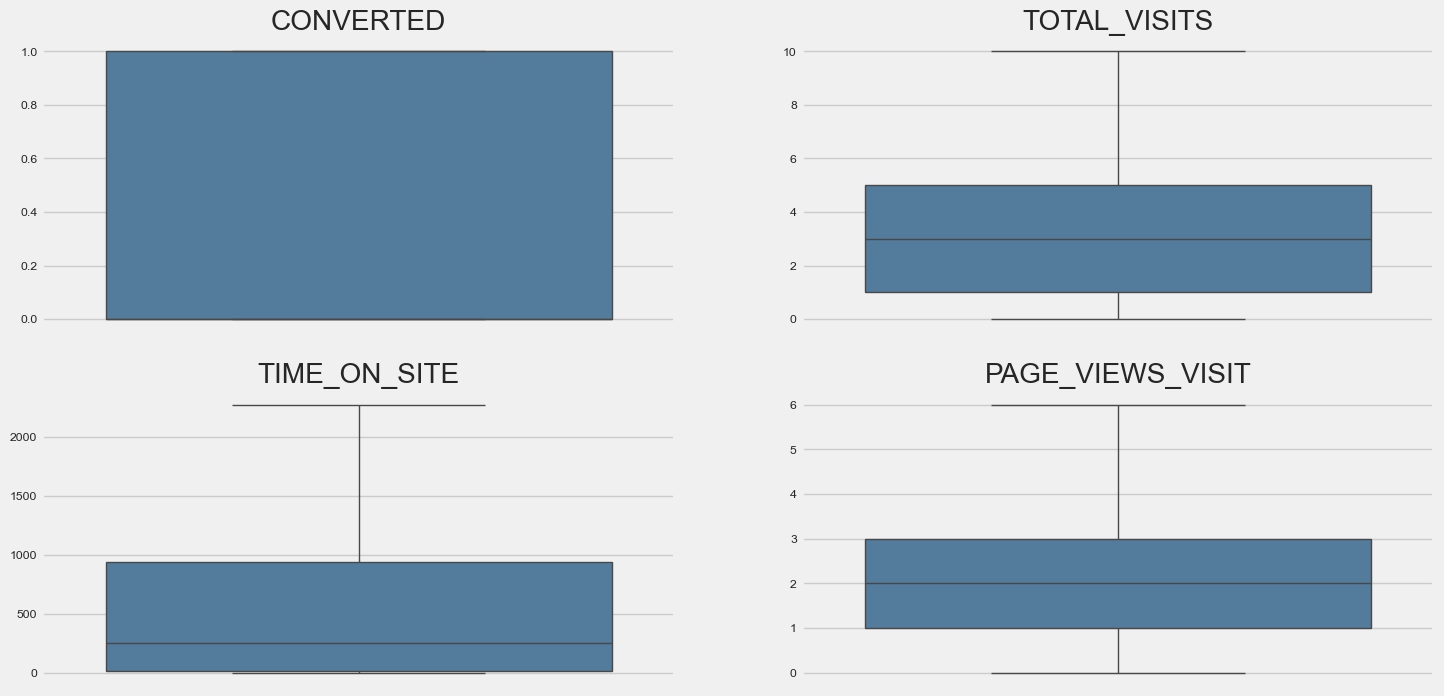

In [145]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col], color= '#477ca8')
    plt.title(col)
    plt.ylabel('')
    i+=1

In [146]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,CONVERTED,TOTAL_VISITS,TIME_ON_SITE,PAGE_VIEWS_VISIT
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


<a id="fconvert"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Convert Binary Categories
            </span>   
        </font>    
</h2>

In [147]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

RECEIVE_EMAIL          2
CONVERTED              2
ID_ORIGIN              5
WORK_STATUS            7
ID_SOURCE              9
TOTAL_VISITS          11
LAST_ACTIVITY         11
CUST_BACKGROUND       19
PAGE_VIEWS_VISIT      91
TIME_ON_SITE        1731
dtype: int64

In [148]:
# Checking the categorical values for 'Do Not Email' feature
lead['RECEIVE_EMAIL'].value_counts()

RECEIVE_EMAIL
No     8506
Yes     734
Name: count, dtype: int64

In [149]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['RECEIVE_EMAIL'] = lead[['RECEIVE_EMAIL']].apply(binary_map)

In [150]:
# rechecking the categorical values for 'Do Not Email' feature
lead['RECEIVE_EMAIL'].value_counts()

RECEIVE_EMAIL
0    8506
1     734
Name: count, dtype: int64

<a id="dummy"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Dummy Variables
            </span>   
        </font>    
</h2>

In [151]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['ID_ORIGIN', 'ID_SOURCE', 'WORK_STATUS', 'LAST_ACTIVITY', 'CUST_BACKGROUND']], drop_first=True, dtype= float)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,ID_ORIGIN,ID_SOURCE,RECEIVE_EMAIL,CONVERTED,TOTAL_VISITS,TIME_ON_SITE,PAGE_VIEWS_VISIT,LAST_ACTIVITY,CUST_BACKGROUND,WORK_STATUS,ID_ORIGIN_Landing Page Submission,ID_ORIGIN_Lead Add Form,ID_ORIGIN_Lead Import,ID_ORIGIN_Quick Add Form,ID_SOURCE_Facebook,ID_SOURCE_Google,ID_SOURCE_Olark Chat,ID_SOURCE_Organic Search,ID_SOURCE_Other Sources,ID_SOURCE_Reference,ID_SOURCE_Referral Sites,ID_SOURCE_Welingak Website,WORK_STATUS_Housewife,WORK_STATUS_Other,WORK_STATUS_Student,WORK_STATUS_Unemployed,WORK_STATUS_Unknown,WORK_STATUS_Working Professional,LAST_ACTIVITY_Email Bounced,LAST_ACTIVITY_Email Link Clicked,LAST_ACTIVITY_Email Opened,LAST_ACTIVITY_Form Submitted on Website,LAST_ACTIVITY_Olark Chat Conversation,LAST_ACTIVITY_Other Activity,LAST_ACTIVITY_Page Visited on Website,LAST_ACTIVITY_SMS Sent,LAST_ACTIVITY_Unreachable,LAST_ACTIVITY_Unsubscribed,CUST_BACKGROUND_Business Administration,CUST_BACKGROUND_E-Business,CUST_BACKGROUND_E-COMMERCE,CUST_BACKGROUND_Finance Management,CUST_BACKGROUND_Healthcare Management,CUST_BACKGROUND_Hospitality Management,CUST_BACKGROUND_Human Resource Management,CUST_BACKGROUND_IT Projects Management,CUST_BACKGROUND_International Business,CUST_BACKGROUND_Marketing Management,CUST_BACKGROUND_Media and Advertising,CUST_BACKGROUND_Operations Management,CUST_BACKGROUND_Others,CUST_BACKGROUND_Retail Management,CUST_BACKGROUND_Rural and Agribusiness,CUST_BACKGROUND_Services Excellence,CUST_BACKGROUND_Supply Chain Management,CUST_BACKGROUND_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<a id="scaling"></a>
<h2>   
      <font color = lightblue >
            <span style='font-family:Georgia'>
            Feature Scaling
            </span>   
        </font>    
</h2>

In [152]:
scaler = StandardScaler()

lead[['TIME_ON_SITE','PAGE_VIEWS_VISIT','TOTAL_VISITS']] = scaler.fit_transform(lead[['TIME_ON_SITE','PAGE_VIEWS_VISIT','TOTAL_VISITS']])
lead.head()

,ID_ORIGIN,ID_SOURCE,RECEIVE_EMAIL,CONVERTED,TOTAL_VISITS,TIME_ON_SITE,PAGE_VIEWS_VISIT,LAST_ACTIVITY,CUST_BACKGROUND,WORK_STATUS,ID_ORIGIN_Landing Page Submission,ID_ORIGIN_Lead Add Form,ID_ORIGIN_Lead Import,ID_ORIGIN_Quick Add Form,ID_SOURCE_Facebook,ID_SOURCE_Google,ID_SOURCE_Olark Chat,ID_SOURCE_Organic Search,ID_SOURCE_Other Sources,ID_SOURCE_Reference,ID_SOURCE_Referral Sites,ID_SOURCE_Welingak Website,WORK_STATUS_Housewife,WORK_STATUS_Other,WORK_STATUS_Student,WORK_STATUS_Unemployed,WORK_STATUS_Unknown,WORK_STATUS_Working Professional,LAST_ACTIVITY_Email Bounced,LAST_ACTIVITY_Email Link Clicked,LAST_ACTIVITY_Email Opened,LAST_ACTIVITY_Form Submitted on Website,LAST_ACTIVITY_Olark Chat Conversation,LAST_ACTIVITY_Other Activity,LAST_ACTIVITY_Page Visited on Website,LAST_ACTIVITY_SMS Sent,LAST_ACTIVITY_Unreachable,LAST_ACTIVITY_Unsubscribed,CUST_BACKGROUND_Business Administration,CUST_BACKGROUND_E-Business,CUST_BACKGROUND_E-COMMERCE,CUST_BACKGROUND_Finance Management,CUST_BACKGROUND_Healthcare Management,CUST_BACKGROUND_Hospitality Management,CUST_BACKGROUND_Human Resource Management,CUST_BACKGROUND_IT Projects Management,CUST_BACKGROUND_International Business,CUST_BACKGROUND_Marketing Management,CUST_BACKGROUND_Media and Advertising,CUST_BACKGROUND_Operations Management,CUST_BACKGROUND_Others,CUST_BACKGROUND_Retail Management,CUST_BACKGROUND_Rural and Agribusiness,CUST_BACKGROUND_Services Excellence,CUST_BACKGROUND_Supply Chain Management,CUST_BACKGROUND_Travel and Tourism
0,API,Olark Chat,0,0,-1.151445,-0.889974,-1.267358,Page Visited on Website,Others,Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,API,Organic Search,0,0,0.659447,0.339972,0.137630,Email Opened,Others,Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Landing Page Submission,Direct Traffic,0,1,-0.427088,1.905689,-0.143368,Email Opened,Business Administration,Student,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Landing Page Submission,Direct Traffic,0,0,-0.789267,-0.333396,-0.705363,Unreachable,Media and Advertising,Unemployed,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Landing Page Submission,Google,0,1,-0.427088,1.715905,-0.705363,Converted to Lead,Others,Unemployed,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [153]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['ID_ORIGIN', 'ID_SOURCE', 'WORK_STATUS', 'LAST_ACTIVITY', 'CUST_BACKGROUND'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   RECEIVE_EMAIL                              9240 non-null   int64  
 1   CONVERTED                                  9240 non-null   int64  
 2   TOTAL_VISITS                               9240 non-null   float64
 3   TIME_ON_SITE                               9240 non-null   float64
 4   PAGE_VIEWS_VISIT                           9240 non-null   float64
 5   ID_ORIGIN_Landing Page Submission          9240 non-null   float64
 6   ID_ORIGIN_Lead Add Form                    9240 non-null   float64
 7   ID_ORIGIN_Lead Import                      9240 non-null   float64
 8   ID_ORIGIN_Quick Add Form                   9240 non-null   float64
 9   ID_SOURCE_Facebook                         9240 non-null   float64
 10  ID_SOURCE_Google        

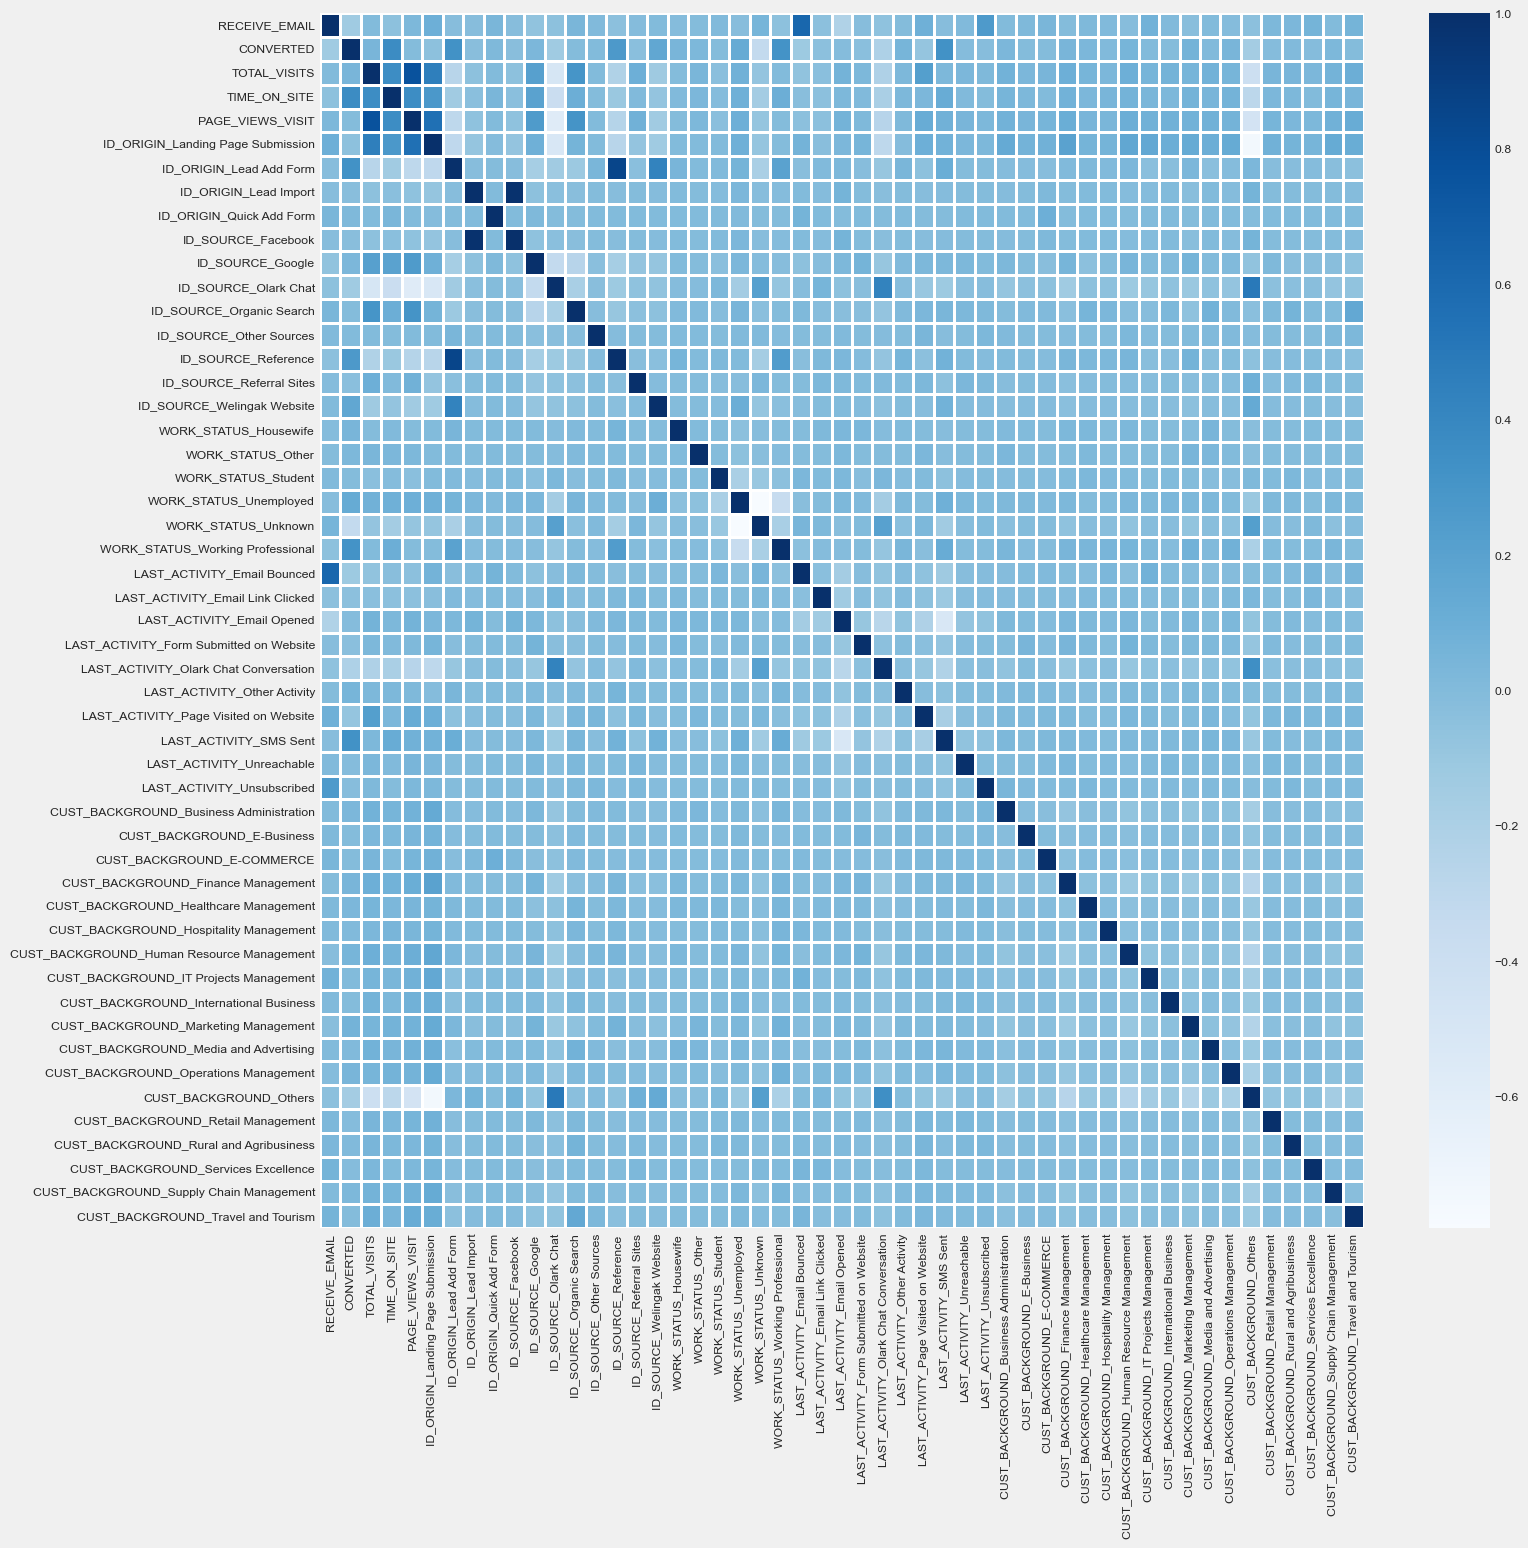

In [154]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="Blues",linewidth =1)
plt.show()

In [155]:
print('Total number of columns after One-Hot Encoding : ',len(lead.columns))

Total number of columns after One-Hot Encoding :  51


In [156]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool_))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
466,ID_SOURCE_Facebook,ID_ORIGIN_Lead Import,0.981709
720,ID_SOURCE_Reference,ID_ORIGIN_Lead Add Form,0.853237
206,PAGE_VIEWS_VISIT,TOTAL_VISITS,0.767585
1173,LAST_ACTIVITY_Email Bounced,RECEIVE_EMAIL,0.618470
259,ID_ORIGIN_Landing Page Submission,PAGE_VIEWS_VISIT,0.553423


In [157]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1091,WORK_STATUS_Unknown,WORK_STATUS_Unemployed,-0.794875
2300,CUST_BACKGROUND_Others,ID_ORIGIN_Landing Page Submission,-0.748263
565,ID_SOURCE_Olark Chat,PAGE_VIEWS_VISIT,-0.573334
566,ID_SOURCE_Olark Chat,ID_ORIGIN_Landing Page Submission,-0.512950
1555,LAST_ACTIVITY_SMS Sent,LAST_ACTIVITY_Email Opened,-0.512325
